<a href="https://colab.research.google.com/github/sunil1206/Data-science/blob/main/outlet_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train=pd.read_csv('/content/train_v9rqX0R.csv')
test=pd.read_csv('/content/test_AbJTz2l.csv')

In [ ]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


# missing number

In [ ]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
train.Item_Weight.fillna(train.Item_Weight.mean(), inplace=True)

test.Item_Weight.fillna(test.Item_Weight.mean(), inplace=True)

In [ ]:
train.Outlet_Size.mode()


0    Medium
dtype: object

In [ ]:
train.Outlet_Size.fillna('Medium', inplace=True)

test.Outlet_Size.fillna('Medium', inplace=True)

In [ ]:
import seaborn as sns 


In [ ]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


In [ ]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


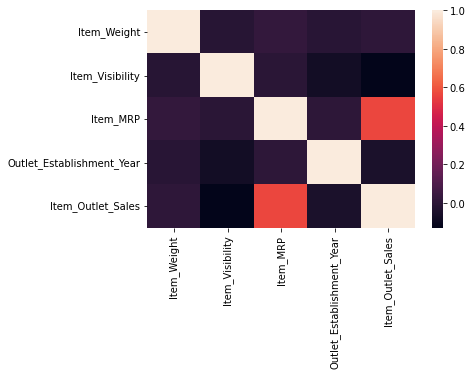

In [ ]:
sns.heatmap(train.corr())

In [ ]:
numerical= train.select_dtypes(include=[np.number])
catagorical=train.select_dtypes(exclude=[np.number])

In [ ]:
catagorical.nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [ ]:
catagorical

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [ ]:
catagorical.nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [ ]:
catagorical.isna().sum()

Item_Identifier         0
Item_Fat_Content        0
Item_Type               0
Outlet_Identifier       0
Outlet_Size             0
Outlet_Location_Type    0
Outlet_Type             0
dtype: int64

Encode

In [ ]:
catagorical.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
cls=['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

le = LabelEncoder()
for i in range(len(cls)):
  catagorical[cls[i]] = le.fit_transform(catagorical[cls[i]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
catagorical

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,1,4,9,1,0,1
1,8,2,14,3,1,2,2
2,662,1,10,9,1,0,1
3,1121,2,6,0,1,2,0
4,1297,1,9,1,0,2,1
...,...,...,...,...,...,...,...
8518,370,1,13,1,0,2,1
8519,897,2,0,7,1,1,1
8520,1357,1,8,6,2,1,1
8521,681,2,13,3,1,2,2


In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [ ]:
grp_item=pd.DataFrame(train.groupby('Item_Type')['Item_Outlet_Sales'].value_counts())
grp_item

Item_Outlet_Sales
Item_Type     Item_Outlet_Sales                   
Baking Goods  539.2980                           5
              1518.0240                          5
              1211.7560                          4
              126.5020                           3
              392.8220                           3
...                                            ...
Starchy Foods 6478.2340                          1
              6757.8700                          1
              7033.5112                          1
              7443.6440                          1
              8132.0812                          1

[7123 rows x 1 columns]

In [ ]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

# Encoding And feature engineering

In [ ]:
print(train.shape)
print(train.shape)
print(test.shape)

(8523, 12)
(8523, 12)
(5681, 11)


In [ ]:
def convert_Item_Fat_Content(val):
  if val == 'Low Fat':
    return 0
  elif val == 'Regular':
    return 1
  elif val =='LF':
    return 0
  elif val =='reg':
    return 1
  elif val =='low fat':
    return 0        
  else:
    return 2 
train['Item_Fat_Content']=train['Item_Fat_Content'].apply(convert_Item_Fat_Content)  
test['Item_Fat_Content']=test['Item_Fat_Content'].apply(convert_Item_Fat_Content)    

In [ ]:
def convert_Outlet_Location_Type(val):
  if val == 'Tier 1':
    return 0
  elif val == 'Tier 2':
    return 1
  else:
    return 2

In [ ]:
print(train.shape)
print(train.shape)
print(test.shape)

(8523, 12)
(8523, 12)
(5681, 11)


In [ ]:
train['Outlet_Location_Type']=train['Outlet_Location_Type'].apply(convert_Outlet_Location_Type) 
test['Outlet_Location_Type']=test['Outlet_Location_Type'].apply(convert_Outlet_Location_Type)    

In [ ]:

from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# train['Outlet_Location_Type']=le.fit_transform(train.Outlet_Location_Type)
# test['Outlet_Location_Type']=le.fit_transform(test.Outlet_Location_Type)

In [ ]:
# train['Item_Type']=le.fit_transform(train.Item_Type)
# test['Item_Type']=le.fit_transform(test.Item_Type)

In [ ]:
# train['Outlet_Type']=le.fit_transform(train.Outlet_Type)
# test['Outlet_Type']=le.fit_transform(test.Outlet_Type)

In [ ]:
# train['Outlet_Size']=le.fit_transform(train.Outlet_Size)
# test['Outlet_Size']=le.fit_transform(test.Outlet_Size)

In [ ]:
train['Item_Weight']=train['Item_Weight'].astype('int')
test['Item_Weight']=test['Item_Weight'].astype('int')

In [ ]:
cls=['Outlet_Size','Outlet_Type','Item_Type'
     
       ]

le = LabelEncoder()
for i in range(len(cls)):
  train[cls[i]] = le.fit_transform(train[cls[i]])
  test[cls[i]] = le.fit_transform(test[cls[i]])

In [ ]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [ ]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19,1,0.000000,6,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6,0,0.056783,13,214.5218,OUT013,1987,0,2,1,2778.3834
8519,FDS36,8,1,0.046982,0,108.1570,OUT045,2002,1,1,1,549.2850
8520,NCJ29,10,0,0.035186,8,85.1224,OUT035,2004,2,1,1,1193.1136
8521,FDN46,7,1,0.145221,13,103.1332,OUT018,2009,1,2,2,1845.5976


In [ ]:
train.nunique()

Item_Identifier              1559
Item_Weight                    18
Item_Fat_Content                2
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [ ]:
print('mean',train['Item_MRP'].mean())
print('max',train['Item_MRP'].idxmax())
print('min',train['Item_MRP'].idxmin())

mean 140.9927819781768
max 4802
min 153


In [ ]:
train.dtypes

Item_Identifier               object
Item_Weight                    int64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [ ]:
train['Item_MRP'].std()

62.27506651219039

In [ ]:
# train['mrp/wt']=train['Item_MRP']/train['Item_Weight']

In [ ]:
train['Item_MRP']=train['Item_MRP'].astype('int')
test['Item_MRP']=test['Item_MRP'].astype('int')

In [ ]:
train['mrp/wt']=(train['Item_MRP']/train['Item_Weight']).astype(int)
train['experience']=2022-train['Outlet_Establishment_Year']
test['mrp/wt']=(test['Item_MRP']/test['Item_Weight']).astype(int)
test['experience']=2022-test['Outlet_Establishment_Year']
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,mrp/wt,experience
0,FDA15,9,0,0.016047,4,249,OUT049,1999,1,0,1,3735.1380,27,23
1,DRC01,5,1,0.019278,14,48,OUT018,2009,1,2,2,443.4228,9,13
2,FDN15,17,0,0.016760,10,141,OUT049,1999,1,0,1,2097.2700,8,23
3,FDX07,19,1,0.000000,6,182,OUT010,1998,1,2,0,732.3800,9,24
4,NCD19,8,0,0.000000,9,53,OUT013,1987,0,2,1,994.7052,6,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6,0,0.056783,13,214,OUT013,1987,0,2,1,2778.3834,35,35
8519,FDS36,8,1,0.046982,0,108,OUT045,2002,1,1,1,549.2850,13,20
8520,NCJ29,10,0,0.035186,8,85,OUT035,2004,2,1,1,1193.1136,8,18
8521,FDN46,7,1,0.145221,13,103,OUT018,2009,1,2,2,1845.5976,14,13


In [ ]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,mrp/wt,experience
0,FDA15,9,0,0.016047,4,249,OUT049,1999,1,0,1,3735.1380,27,23
1,DRC01,5,1,0.019278,14,48,OUT018,2009,1,2,2,443.4228,9,13
2,FDN15,17,0,0.016760,10,141,OUT049,1999,1,0,1,2097.2700,8,23
3,FDX07,19,1,0.000000,6,182,OUT010,1998,1,2,0,732.3800,9,24
4,NCD19,8,0,0.000000,9,53,OUT013,1987,0,2,1,994.7052,6,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6,0,0.056783,13,214,OUT013,1987,0,2,1,2778.3834,35,35
8519,FDS36,8,1,0.046982,0,108,OUT045,2002,1,1,1,549.2850,13,20
8520,NCJ29,10,0,0.035186,8,85,OUT035,2004,2,1,1,1193.1136,8,18
8521,FDN46,7,1,0.145221,13,103,OUT018,2009,1,2,2,1845.5976,14,13


In [ ]:
train['Item_Type'].value_counts()

6     1232
13    1200
9      910
5      856
4      682
3      649
0      648
8      520
14     445
10     425
1      251
7      214
11     169
15     148
2      110
12      64
Name: Item_Type, dtype: int64

In [ ]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'mrp/wt', 'experience'],
      dtype='object')

In [ ]:
# def convert_Item_Type(val):
#   if val == 'Fruits and Vegetables':
#     return 0
#   elif val == 'Snack Foods':
#     return 1
#   elif val =='Household':
#     return 0
#   elif val =='Frozen Foods':
#     return 1
#   elif val =='Dairy':
#     return 0
#   elif val == 'Snack Foods':
#     return 1
#   elif val =='LF':
#     return 0
#   elif val =='reg':
#     return 1
#   elif val =='low fat':
#     return 0                 
#   else:
#     return 2 
# train['Item_Fat_Content']=train['Item_Fat_Content'].apply(convert_Item_Fat_Content)      

In [ ]:
print(train.shape)
print(train.shape)
print(test.shape)

(8523, 14)
(8523, 14)
(5681, 13)


In [ ]:
train = pd.get_dummies(train, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type'],drop_first=True)

test = pd.get_dummies(test, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type'],drop_first=True)

In [ ]:
train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,mrp/wt,experience,Item_Fat_Content_1,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
0,FDA15,9,0.016047,249,OUT049,1999,3735.1380,27,23,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,DRC01,5,0.019278,48,OUT018,2009,443.4228,9,13,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,FDN15,17,0.016760,141,OUT049,1999,2097.2700,8,23,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,FDX07,19,0.000000,182,OUT010,1998,732.3800,9,24,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,NCD19,8,0.000000,53,OUT013,1987,994.7052,6,35,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6,0.056783,214,OUT013,1987,2778.3834,35,35,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8,0.046982,108,OUT045,2002,549.2850,13,20,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10,0.035186,85,OUT035,2004,1193.1136,8,18,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7,0.145221,103,OUT018,2009,1845.5976,14,13,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# test.drop(['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type'],axis=1,inplace=True)
# train.drop(['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type'],axis=1,inplace=True)

In [ ]:
train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,mrp/wt,experience,Item_Fat_Content_1,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
0,FDA15,9,0.016047,249,OUT049,1999,3735.1380,27,23,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,DRC01,5,0.019278,48,OUT018,2009,443.4228,9,13,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,FDN15,17,0.016760,141,OUT049,1999,2097.2700,8,23,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,FDX07,19,0.000000,182,OUT010,1998,732.3800,9,24,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,NCD19,8,0.000000,53,OUT013,1987,994.7052,6,35,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6,0.056783,214,OUT013,1987,2778.3834,35,35,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8,0.046982,108,OUT045,2002,549.2850,13,20,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10,0.035186,85,OUT035,2004,1193.1136,8,18,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7,0.145221,103,OUT018,2009,1845.5976,14,13,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


# scale

In [ ]:
print(train.shape)
print(train.shape)
print(test.shape)

(8523, 32)
(8523, 32)
(5681, 31)


In [ ]:
train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,mrp/wt,experience,Item_Fat_Content_1,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
0,FDA15,9,0.016047,249,OUT049,1999,3735.1380,27,23,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,DRC01,5,0.019278,48,OUT018,2009,443.4228,9,13,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,FDN15,17,0.016760,141,OUT049,1999,2097.2700,8,23,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,FDX07,19,0.000000,182,OUT010,1998,732.3800,9,24,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,NCD19,8,0.000000,53,OUT013,1987,994.7052,6,35,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6,0.056783,214,OUT013,1987,2778.3834,35,35,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8,0.046982,108,OUT045,2002,549.2850,13,20,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10,0.035186,85,OUT035,2004,1193.1136,8,18,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7,0.145221,103,OUT018,2009,1845.5976,14,13,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# from sklearn.preprocessing import StandardScaler
# ss=StandardScaler()
# x=ss.fit_transform(x)

In [ ]:
train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,mrp/wt,experience,Item_Fat_Content_1,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
0,FDA15,9,0.016047,249,OUT049,1999,3735.1380,27,23,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,DRC01,5,0.019278,48,OUT018,2009,443.4228,9,13,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,FDN15,17,0.016760,141,OUT049,1999,2097.2700,8,23,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,FDX07,19,0.000000,182,OUT010,1998,732.3800,9,24,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,NCD19,8,0.000000,53,OUT013,1987,994.7052,6,35,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6,0.056783,214,OUT013,1987,2778.3834,35,35,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8,0.046982,108,OUT045,2002,549.2850,13,20,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10,0.035186,85,OUT035,2004,1193.1136,8,18,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7,0.145221,103,OUT018,2009,1845.5976,14,13,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
train

,Item_Identifier,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,mrp/wt,experience,Item_Fat_Content_1,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_1,Outlet_Size_2,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4,Item_Type_5,Item_Type_6,Item_Type_7,Item_Type_8,Item_Type_9,Item_Type_10,Item_Type_11,Item_Type_12,Item_Type_13,Item_Type_14,Item_Type_15
0,FDA15,9,0.016047,249,OUT049,1999,3735.1380,27,23,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,DRC01,5,0.019278,48,OUT018,2009,443.4228,9,13,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,FDN15,17,0.016760,141,OUT049,1999,2097.2700,8,23,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,FDX07,19,0.000000,182,OUT010,1998,732.3800,9,24,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,NCD19,8,0.000000,53,OUT013,1987,994.7052,6,35,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6,0.056783,214,OUT013,1987,2778.3834,35,35,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8519,FDS36,8,0.046982,108,OUT045,2002,549.2850,13,20,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8520,NCJ29,10,0.035186,85,OUT035,2004,1193.1136,8,18,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8521,FDN46,7,0.145221,103,OUT018,2009,1845.5976,14,13,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
x_train= train.drop(['Item_Outlet_Sales', 'Outlet_Identifier','Item_Identifier'], axis=1)
y_train = train.Item_Outlet_Sales

x_test = test.drop(['Outlet_Identifier','Item_Identifier'], axis=1)


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledRFR', Pipeline([('Scaler', StandardScaler()),('RFR', RandomForestRegressor())])))

# results = []
# names = []
# for name, model in pipelines:
  
#   model.fit(x_train, y_train)
#   y_pred = regressor.predict(x_test)
#   score= np.sqrt(mean_squared_error(y_train, regressor.predict(x_train)))
#   results.append(score)
#   names.append(name)
#   print(score)
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    #cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    # np.sqrt(mean_squared_error(y_train, regressor.predict(X_train))
    # y_pred = regressor.predict(X_test)  

# Predicting the test set results



ScaledLR: -1282342.171332 (36710.040611)
ScaledLASSO: -1282375.217700 (36900.121681)
ScaledEN: -1598004.845175 (79780.434983)
ScaledKNN: -1500536.503179 (82690.719964)
ScaledCART: -2380895.542092 (183178.305313)
ScaledGBM: -1188829.793710 (46134.993502)
ScaledRFR: -1317889.944328 (57253.786764)


DecisionTreeRegressor

In [ ]:

regressor = DecisionTreeRegressor()
regressor.fit(x_train, y_train)

# Predicting the test set results
y_pred = regressor.predict(x_test)
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train, regressor.predict(x_train))))

RMSE : 4.266e-15


In [ ]:
submission = pd.DataFrame({
'Item_Identifier':test['Item_Identifier'],
'Outlet_Identifier':test['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [ ]:
submission.to_csv('submission_dt.csv',index=False)

In [ ]:
# Fitting Multiple Linear Regression to the training set
from sklearn.linear_model import  LinearRegression
regressor = GradientBoostingRegressor()
regressor.fit(x_train, y_train)

# Predicting the test set results
y_pred = regressor.predict(x_test)
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train, regressor.predict(x_train))))

RMSE : 1047


Random forest

In [ ]:
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

# Predicting the test set results
y_pred = regressor.predict(x_test)
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train, regressor.predict(x_train))))

RMSE : 427.5


In [ ]:
submission = pd.DataFrame({
'Item_Identifier':test['Item_Identifier'],
'Outlet_Identifier':test['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [ ]:
submission.to_csv('submission_rf.csv',index=False)

In [ ]:
# results = []
# names = []
# for name, model in pipelines:
#     kfold = KFold(n_splits=10)
#     #cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
#     cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)

#     np.sqrt(mean_squared_error(y_train, regressor.predict(X_train))
#     y_pred = regressor.predict(X_test)

In [ ]:
best_score = 0.0
best_params = {'max_depth': None, 'max_features': 'auto','n_estimators': 10}
for max_depth in [None, 2,3,5]:
    for max_features in ['auto','sqrt', 'log2']:
        for n_estimators in [10,100,200]:
            score = cross_val_score(GradientBoostingRegressor(n_estimators=n_estimators,
                                                          max_features=max_features,
                                                          max_depth=max_depth,
                                                          random_state=123
                                                          ),
                                    x_train,
                                    y_train,
                                    cv=5,
                                    n_jobs=-1).mean()
            if score > best_score:
                best_score= score
                best_params['max_depth'],best_params['max_features'], best_params['n_estimators'] = max_depth, max_features, n_estimators

            print('max_depth : %s, max_features : %s, n_estimators : %s , Average R^2 Score : %.4f'%(str(max_depth), max_features, str(n_estimators), score))

print('\nBest Score : %.4f, Best Params : %s'%(best_score, str(best_params)))

max_depth : None, max_features : auto, n_estimators : 10 , Average R^2 Score : 0.3652
max_depth : None, max_features : auto, n_estimators : 100 , Average R^2 Score : 0.2183
max_depth : None, max_features : auto, n_estimators : 200 , Average R^2 Score : 0.2183
max_depth : None, max_features : sqrt, n_estimators : 10 , Average R^2 Score : 0.4812
max_depth : None, max_features : sqrt, n_estimators : 100 , Average R^2 Score : 0.5190
max_depth : None, max_features : sqrt, n_estimators : 200 , Average R^2 Score : 0.5190
max_depth : None, max_features : log2, n_estimators : 10 , Average R^2 Score : 0.4803
max_depth : None, max_features : log2, n_estimators : 100 , Average R^2 Score : 0.5171
max_depth : None, max_features : log2, n_estimators : 200 , Average R^2 Score : 0.5171
max_depth : 2, max_features : auto, n_estimators : 10 , Average R^2 Score : 0.3417
max_depth : 2, max_features : auto, n_estimators : 100 , Average R^2 Score : 0.5856
max_depth : 2, max_features : auto, n_estimators : 20

In [ ]:

regressor = GradientBoostingRegressor(max_depth= 3, max_features= 'auto', n_estimators= 100)
regressor.fit(x_train, y_train)

# Predicting the test set results
y_pred = regressor.predict(x_test)
print("RMSE : %.4g" % np.sqrt(mean_squared_error(y_train, regressor.predict(x_train))))

RMSE : 1047


In [ ]:
submission = pd.DataFrame({
'Item_Identifier':test['Item_Identifier'],
'Outlet_Identifier':test['Outlet_Identifier'],
'Item_Outlet_Sales': y_pred
},columns=['Item_Identifier','Outlet_Identifier','Item_Outlet_Sales'])

In [ ]:
submission.to_csv('submission_gbr.csv',index=False)

In [ ]:
submission.loc[submission['Item_Outlet_Sales']<0]

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
30,NCR42,OUT019,-134.050729
46,FDR14,OUT010,-258.290021
173,FDM60,OUT010,-245.439678
199,FDZ40,OUT019,-46.845302
211,NCC55,OUT019,-132.303690
...,...,...,...
5388,DRH11,OUT019,-46.845302
5423,NCO54,OUT010,-184.642947
5427,FDX46,OUT010,-166.333071
5450,FDT36,OUT019,-102.005705


In [ ]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1725.653966
1,FDW14,OUT017,1456.575643
2,NCN55,OUT010,945.813782
3,FDQ58,OUT017,2498.533462
4,FDY38,OUT027,5664.142556
...,...,...,...
5676,FDB58,OUT046,1971.929851
5677,FDD47,OUT018,2666.782766
5678,NCO17,OUT045,1871.267558
5679,FDJ26,OUT017,3894.998366
